### Demonstrating the use of OpenAI CLIP for multimodal understanding

""" The theme of the code demonstrates the use of OpenAI CLIP for multimodal understanding, 
specifically to compute text-to-image similarity. The program evaluates how closely various text 
descriptions match a given image by leveraging CLIP's ability to align textual and visual representations."""

Text: 'A dog running on the beach' | Similarity: 0.3106
Text: 'A golden retriever in a park' | Similarity: 0.1987
Text: 'A person surfing on a beach' | Similarity: 0.2373
Text: 'A sunset over the ocean' | Similarity: 0.2173


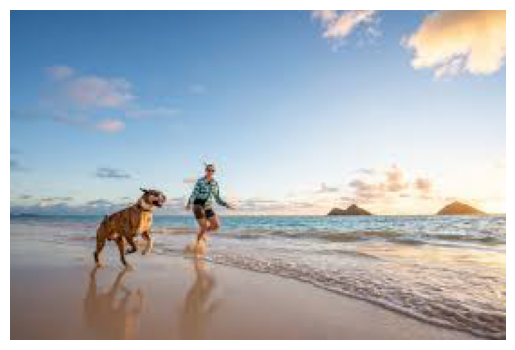

In [17]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

# Function to display the image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example image and text for image-to-text search
image_path = 'dog_with_person_on_beach.jpg'  # Replace with your image path
text_descriptions = ["A dog running on the beach", 
                     "A golden retriever in a park", 
                     "A person surfing on a beach", 
                     "A sunset over the ocean"]

# Preprocess image and text
image = Image.open(image_path)
inputs = processor(text=text_descriptions, images=image, return_tensors="pt", padding=True)

# Get image and text features
with torch.no_grad():
    outputs = model(**inputs)

# Calculate similarity
image_features = outputs.image_embeds
text_features = outputs.text_embeds
similarities = torch.cosine_similarity(image_features, text_features)

# Show similarity scores
for i, text in enumerate(text_descriptions):
    print(f"Text: '{text}' | Similarity: {similarities[i]:.4f}")

# Display the image
display_image(image_path)


#### Interpretation of result

"""
The output shows that the description 'A dog running on the beach' has the highest similarity score (0.3106), 
indicating it best matches the image. This suggests the image most likely depicts a scene closely related to 
the given description, highlighting CLIP's effectiveness in text-to-image relevance.
"""

### Text-to-Image Search Using OpenAI's CLIP Model

"""
The theme of this code is Text-to-Image Search Using OpenAI's CLIP Model. 
It matches a given text description with a set of images by calculating the cosine similarity 
between their embeddings. The image most relevant to the text is identified and displayed. 
This showcases CLIP's ability to understand relationships between text and"""

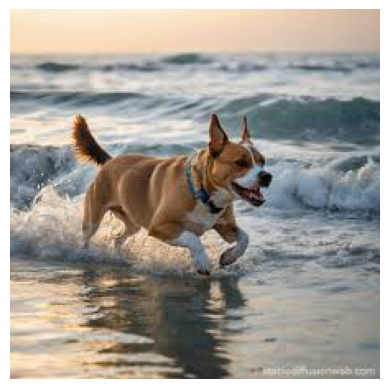

The most relevant image based on the description is: running_dog_on_beach.jpg


In [21]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

# Example images and text description for text-to-image search
images = ["dog_with_person_on_beach.jpg", "empire_state.jpg", "running_dog_on_beach.jpg", "dog_play.jpg", "example_image.jpg"]
text_description = "A dog running on the beach in the sunshine"

# Preprocess the text
inputs_text = processor(text=[text_description], return_tensors="pt", padding=True)

# List to store similarities for each image
image_similarities = []

# Loop through images
for image_path in images:
    # Open image
    image = Image.open(image_path)
    
    # Preprocess the image and get features
    inputs_image = processor(text=[text_description], images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs_image)
    
    # Calculate similarity
    image_features = outputs.image_embeds
    text_features = outputs.text_embeds
    similarity = torch.cosine_similarity(image_features, text_features)
    
    image_similarities.append((image_path, similarity.item()))

# Sort images by similarity score
sorted_images = sorted(image_similarities, key=lambda x: x[1], reverse=True)

# Display the most relevant image
best_image_path = sorted_images[0][0]
# Assuming display_image is a function to display the image. Replace with your own method if needed.
display_image(best_image_path)

print(f"The most relevant image based on the description is: {best_image_path}")
